## <font color = 'blue'> **Polynomial Regression**

Polynomials: $\hat{y} = \theta_0 + \theta_1 x + \theta_2 x^2 + ... + \theta_p x ^{p}$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
pd.options.display.float_format = '{:,.6g}'.format

In [6]:
np.random.seed(10)
m = 200
x = np.array([i * np.pi/180 for i in np.linspace(60,300,m)])
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['X','Y'])
data.head()

,X,Y
0,1.0472,1.06576
1,1.06825,0.983649
2,1.0893,0.654491
3,1.11035,0.894595
4,1.13139,0.998207


In [5]:
print(data.shape)

(200, 2)


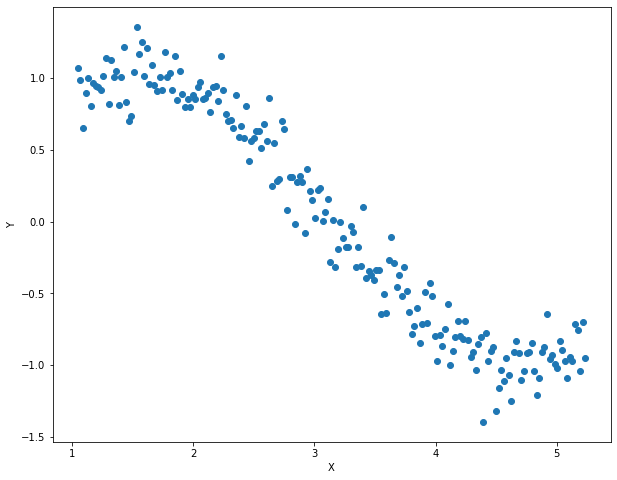

In [7]:
plt.figure(figsize=(10,8))
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(data['X'],data['Y'],'o')

In [8]:
for i in range(1,16):
    colname = 'x_%d'%i
    data[colname] = data['X']**i

In [9]:
data.head()

,X,Y,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1.0472,1.06576,1.0472,1.09662,1.14838,1.20258,1.25934,1.31878,1.38102,1.4462,1.51446,1.58594,1.66079,1.73918,1.82126,1.90722,1.99724
1,1.06825,0.983649,1.06825,1.14115,1.21903,1.30223,1.3911,1.48604,1.58745,1.69579,1.81152,1.93516,2.06722,2.2083,2.35901,2.52001,2.69199
2,1.0893,0.654491,1.0893,1.18657,1.29252,1.40794,1.53366,1.67061,1.81979,1.98229,2.1593,2.35212,2.56215,2.79094,3.04016,3.31163,3.60735
3,1.11035,0.894595,1.11035,1.23287,1.36891,1.51996,1.68768,1.87391,2.08068,2.31028,2.5652,2.84826,3.16255,3.51153,3.89901,4.32924,4.80695
4,1.13139,0.998207,1.13139,1.28005,1.44824,1.63854,1.85383,2.09741,2.373,2.6848,3.03757,3.43669,3.88825,4.39914,4.97716,5.63114,6.37104


In [10]:
from sklearn import linear_model

def plotRegression (data, power,plotarea,plotFlag):

    predictors = []
    #generate list of header names for predictions
    for i in range(1,power+1): predictors.append('x_%d'%i)

    linreg = linear_model.LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['Y'])
    y_pred = linreg.predict(data[predictors])

    rss = np.sqrt(sum((y_pred-data['Y'])**2)/len(y_pred))

    if plotFlag == True:
        plt.subplot(plotarea)
        plt.plot(data['X'],y_pred)
        plt.plot(data['X'],data['Y'],'.')
        plt.title('Plot for power: %d'%power)

    return rss,linreg.intercept_,linreg.coef_

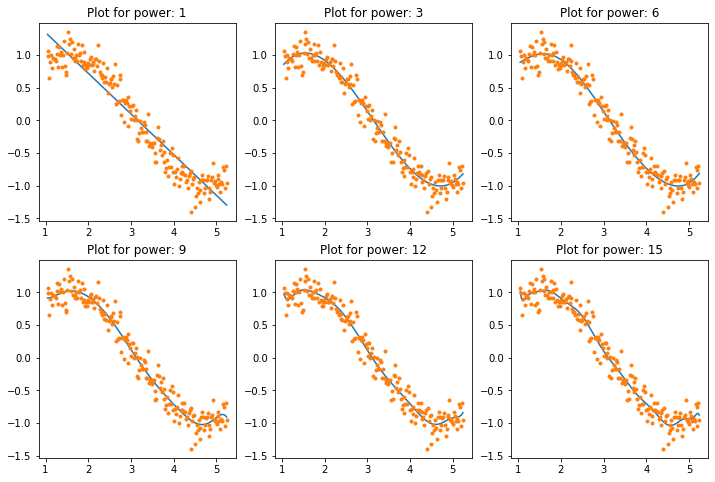

In [11]:
plt.figure(figsize=(12,8))
plotRegression(data,1,"231",True);
plotRegression(data,3,"232",True);
plotRegression(data,6,"233",True);
plotRegression(data,9,"234",True);
plotRegression(data,12,"235",True);
plotRegression(data,15,"236",True);

In [12]:
# Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['Pow_%d'%i for i in range(1,16)]

#Iterate through all powers and assimilate results
coef_matrix_simple = pd.DataFrame(index=ind,columns=col)

for i in range(1,16):
    rss,intercept,coefficients = plotRegression(data,i,"",False)
    coef_matrix_simple.iloc[i-1][0] = rss; #first col is rss
    coef_matrix_simple.iloc[i-1][1] = intercept #second col is intercepts

    for j in range(0,len(coefficients)):
        coef_matrix_simple.iloc[i-1][2+j] = coefficients[j-1]

In [13]:
coef_matrix_simple.replace(np.nan,'')

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
Pow_1,0.233244,1.97137,-0.623959,,,,,,,,,,,,,,
Pow_2,0.2332,2.00039,0.00345703,-0.64568,,,,,,,,,,,,,
Pow_3,0.146184,-0.919486,0.128884,2.8278,-1.21124,,,,,,,,,,,,
Pow_4,0.14617,-1.00289,-0.0013537,2.9634,-1.28626,0.145895,,,,,,,,,,,
Pow_5,0.146119,-0.595386,-0.00242446,2.12458,-0.647,-0.0814563,0.0367296,,,,,,,,,,
Pow_6,0.145919,1.51033,0.00458613,-3.11739,4.45445,-2.57733,0.687978,-0.088871,,,,,,,,,
Pow_7,0.145595,8.43737,-0.0055189,-23.3411,28.4272,-17.5754,6.05695,-1.19324,0.125953,,,,,,,,
Pow_8,0.145192,-11.5983,-0.00583688,43.7616,-65.3937,54.0788,-26.7225,8.03211,-1.43881,0.141178,,,,,,,
Pow_9,0.144991,25.1484,-0.00391326,-95.0847,158.332,-147.936,86.1319,-32.5058,7.94643,-1.21253,0.104808,,,,,,
Pow_10,0.144278,204.68,0.00698722,-850.469,"1,536.67","-1,585.47","1,036.37",-449.158,130.896,-25.3689,3.13479,-0.223423,,,,,


### **Cross Validation**

P: 1 RMSErr Train:  0.23924077324737192 RMSErr Test:  0.21886962278509103
P: 2 RMSErr Train:  0.23918694487024209 RMSErr Test:  0.21956256882815184
P: 3 RMSErr Train:  0.15094252627840105 RMSErr Test:  0.1347750273521584
P: 4 RMSErr Train:  0.15059324686471562 RMSErr Test:  0.13744175553331064
P: 5 RMSErr Train:  0.1505495950875476 RMSErr Test:  0.1373681484299072
P: 6 RMSErr Train:  0.14996897246726515 RMSErr Test:  0.13814416717162437
P: 7 RMSErr Train:  0.14943472153321496 RMSErr Test:  0.13854535347179783
P: 8 RMSErr Train:  0.14871692146925 RMSErr Test:  0.13936711610015434
P: 9 RMSErr Train:  0.1484952939497761 RMSErr Test:  0.1392607513699323
P: 10 RMSErr Train:  0.14790839385078586 RMSErr Test:  0.13829975879205758
P: 11 RMSErr Train:  0.14782206832897482 RMSErr Test:  0.13865931205698484
P: 12 RMSErr Train:  0.14752564815975225 RMSErr Test:  0.13960625677956265
P: 13 RMSErr Train:  0.1474404008147261 RMSErr Test:  0.1404405220418189
P: 14 RMSErr Train:  0.1466752357087616 RMSE

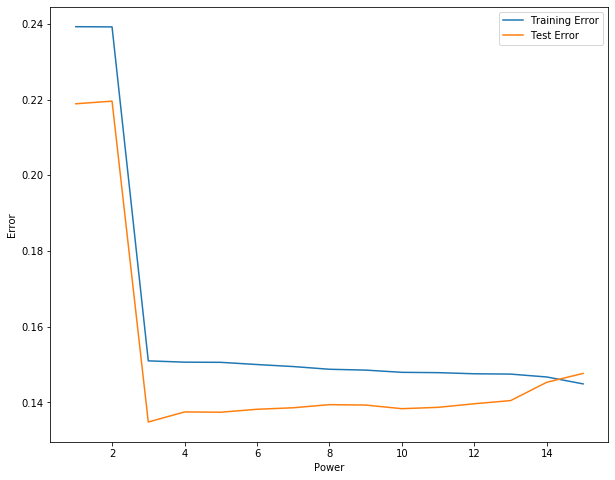

In [16]:
from sklearn import linear_model

def plotRegressionCV(data,power,plotarae,plotFlag):

    #data split into train and test
    X = data.drop('Y',axis=1)
    y = data['Y']

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=1234)

    predictors=[]
    #generate list of header names for prediction
    for i in range(1,power+1): predictors.append('x_%d'%i)

    X_train = X_train[predictors]
    X_test = X_test[predictors]
    y_train = y_train
    y_test = y_test

    linreg = linear_model.LinearRegression(normalize=True)
    linreg.fit(X_train,y_train)

    #print(linref.coef_)
    y_pred_train = linreg.predict(X_train) #use the training dataset to predict
    y_pred_test = linreg.predict(X_test) #use the test dataset to predict

    rss_train = np.sqrt(sum((y_pred_train - y_train)**2)/len(y_pred_train))
    rss_test = np.sqrt(sum((y_pred_test-y_test)**2)/len(y_pred_test))

    return power,rss_train,rss_test

x = []
err_test = []
err_train = []

for n in range(1,16,1):
    p,rss_train,rss_test = plotRegressionCV(data,n,'231',True)
    print("P:",p,"RMSErr Train: ", rss_train, "RMSErr Test: ", rss_test)
    x.append(p)
    err_train.append(rss_train)
    err_test.append(rss_test)

plt.figure(figsize=(10,8))
plt.xlabel('Power')
plt.ylabel('Error')
plt.plot(x,err_train,label = 'Training Error')
plt.plot(x,err_test,label = 'Test Error')
plt.legend()

## **Ridge Regression**

In [18]:
wa = ['tiger','elephant']
an = ['bird','man']
an.append(wa)
an

['bird', 'man', ['tiger', 'elephant']]

In [19]:
an.extend(wa) #add items of a list rather than the list itself
an

['bird', 'man', ['tiger', 'elephant'], 'tiger', 'elephant']

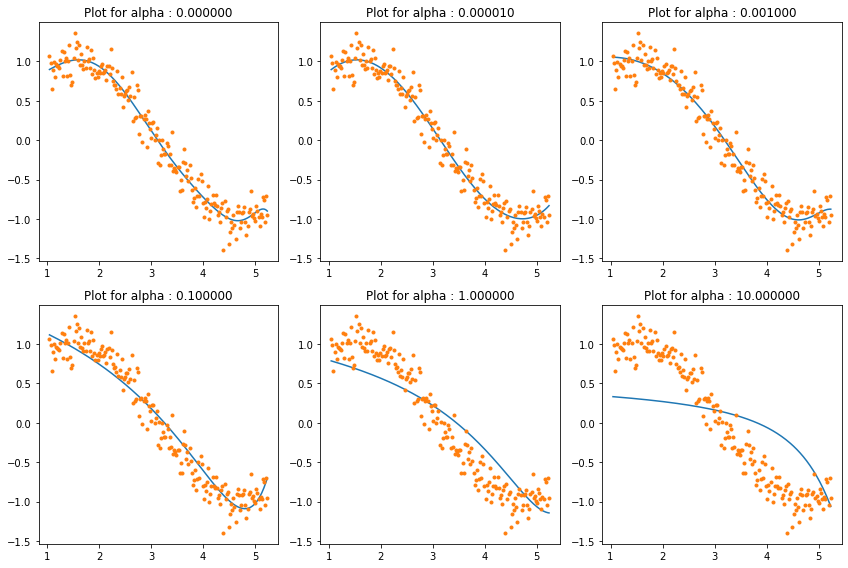

In [23]:
from sklearn.linear_model import Ridge

def ridge_regression(data,alpha,plotarea,plotFlag):
    #header names
    predictors=['X']
    predictors.extend(['x_%d'%i for i in range(2,16)])
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['Y'])
    y_pred = ridgereg.predict(data[predictors])
    rss = sum((y_pred-data['Y'])**2)

    if plotFlag == True:
        plt.subplot(plotarea)
        plt.tight_layout()
        plt.plot(data['X'],y_pred)
        plt.plot(data['X'],data['Y'],'.')
        plt.title('Plot for alpha : %f'%alpha)
    return rss, ridgereg.intercept_, ridgereg.coef_

plt.figure(figsize=(12,8))
ridge_regression(data,1e-8,231,True);
ridge_regression(data,1e-5,232,True);
ridge_regression(data,1e-3,233,True);
ridge_regression(data,1e-1,234,True);
ridge_regression(data,1.0,235,True);
ridge_regression(data,10.0,236,True);

## **Lasso Regression**

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0623571799650793, tolerance: 0.012587621591515096
  positive)
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0152082521108516, tolerance: 0.012587621591515096
  positive)
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06056141267859072, tolerance: 0.012587621591515096
  positive)


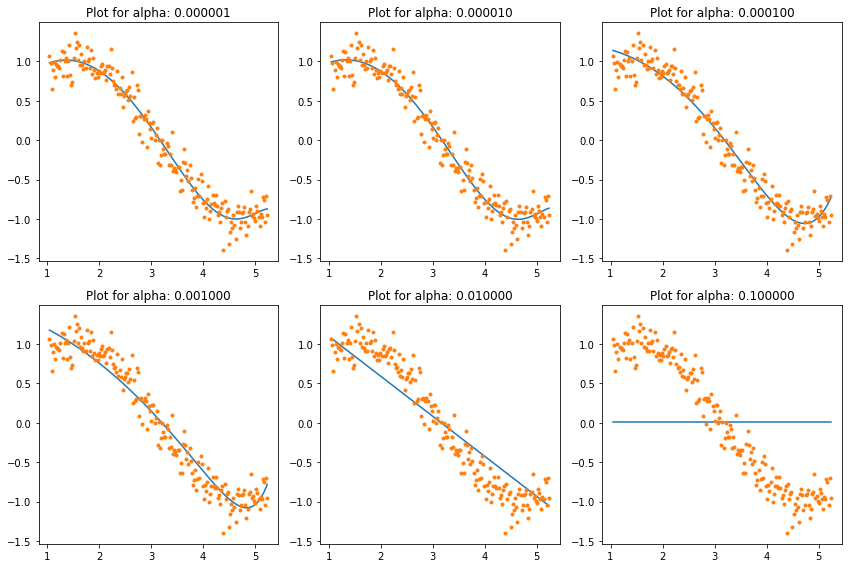

In [24]:
from sklearn.linear_model import Lasso

def lasso_regression(data, alpha, plotarea,plotFlag):
    predictors=['X']
    predictors.extend(['x_%d'%i for i in range(2,16)])
    lassoreg = Lasso(alpha=alpha,normalize=True)
    lassoreg.fit(data[predictors],data['Y'])
    y_pred = lassoreg.predict(data[predictors])    
    rss = sum((y_pred-data['Y'])**2)

    if plotFlag == True:
        plt.subplot(plotarea)
        plt.tight_layout()
        plt.plot(data['X'],y_pred)
        plt.plot(data['X'],data['Y'],'.')
        plt.title('Plot for alpha: %f'%alpha)
    
    return rss, lassoreg.intercept_, lassoreg.coef_

plt.figure(figsize=(12,8))
lasso_regression(data,1e-6, 231, True);
lasso_regression(data,1e-5, 232, True);
lasso_regression(data,1e-4, 233, True);
lasso_regression(data,1e-3, 234, True);
lasso_regression(data,1e-2, 235, True);
lasso_regression(data,1e-1, 236, True);